# Starting the Environment
1. Open an Anaconda Prompt terminal,
   - On windows, Search `anaconda prompt`, click to open
2. Change directory (`cd`) into class directory on your computer,
   - `cd C:\JW\Clarkson\AE470`
3. Change directory into the repository on your computer,
   - `cd AE470_Sp25`
4. Fetch the latest class repository from GitHub,
   - **This will overwrite any changes you have made to files in your local repository directory, `AE470_Sp2025`.**
   - **Be sure to rename any files where you make changes that you want to keep.**
   - `git fetch origin`
5. Reset your local branch repository to match the remote branch,
   - `git reset --hard origin/main`
6. Activate the virtual python environment,
   - `conda activate ae470sp25`
7. Start a Jupyter notebook session in a browser window.  Type the following into an Anaconda Prompt window,
   - `jupyter notebook`
8. Using the Jupyter browser, open this notebook: `08_ae470_time_date_ground_track`.


In [1]:
# Configure Jupyter so figures appear in the notebook
# %matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
# import modsim and install if necessary
try:
    from modsim import *
except ImportError:
    print("Download modsim from the course repository at https://github.com/jeffwalton/AE470")

## Julian Date

*The Julian date (JD) is a continuous count of days from 1 January 4713 BC (= -4712 January 1), Greenwich mean noon (= 12h UT1). For example, AD 1978 January 1, 0h UT1 is JD 2443509.5 and AD 1978 July 21, 15h UT1, is JD 2443711.125.*
See [Julian Date Formula](https://aa.usno.navy.mil/faq/JD_formula) and [Julian Date Converter](https://aa.usno.navy.mil/data/JulianDate) at the U.S. Naval Observatory.


In [3]:
from math import copysign, trunc

def julian_date( year, month, day, ut ):
    jd = 367*year - trunc((7*(year+trunc((month+9)/12)))/4) + trunc((275*month)/9) + day + 1721013.5 + ut/24 - \
        0.5*copysign(1.0,100*year+month-190002.5) + 0.5
    return jd

In [4]:
# test
print(julian_date(1970,1,1,0))
print(julian_date(1978,1,1,0))
print(julian_date(1978,7,21,15))
print(julian_date(1877,8,11,7.5))

2440587.5
2443509.5
2443711.125
2406842.8125


## Universal Time (UT)

See [Universal Time at the U.S. Naval Observatory](https://aa.usno.navy.mil/faq/UT).
*The times of various events, particularly astronomical and weather phenomena, are often given in "Universal Time" (abbreviated UT) which is sometimes referred to, now colloquially, as "Greenwich Mean Time" (abbreviated GMT). The two terms are often used loosely to refer to time kept on the Greenwich meridian (longitude zero), five hours ahead of Eastern Standard Time. Times given in UT are almost always given in terms of a 24-hour clock. Thus, 14:42 (often written simply 1442) is 2:42 p.m., and 21:17 (2117) is 9:17 p.m. Sometimes a Z is appended to a time to indicate UT, as in 0935Z.*

*When a precision of one second or better is needed, however, it is necessary to be more specific about the exact meaning of UT. For that purpose, different designations of Universal Time have been adopted. In astronomical and navigational usage, UT often refers to a specific time called UT1, which is a measure of the rotation angle of the Earth as observed astronomically. It is affected by small variations in the rotation of the Earth. UT1 is a modern form of <u>mean solar time</u> on the Greenwich meridian. Times which may be labeled "Universal Time" or "UT" in data provided by the Astronomical Applications Department of the U.S. Naval Observatory (for example, in the annual almanacs) conform to this definition.*

*In the most common civil usage, UT refers to a time scale called "Coordinated Universal Time" (abbreviated **UTC**), which is the basis for the worldwide system of civil time. This time scale is kept by time laboratories around the world, including the U.S. Naval Observatory, and is determined using highly precise atomic clocks. The International Bureau of Weights and Measures makes use of data from the timing laboratories to provide the international standard UTC which is accurate to approximately a nanosecond (billionth of a second) per day. The length of a UTC second is defined in terms of an atomic transition of the element cesium under specific conditions, and is not directly related to any astronomical phenomena.*


## Other Time Terminology

  - **UT0** - uncorrected observed rotational time - dependent on location of observer
  - **UT1** - corrected for polar motion - independent of location of observer
  - **UTC** - coordinated universal time - maintained within 0.9s of UT1 by adding one-second leap seconds
  - **TAI** - international atomic time
  - **GPS system time** - uncorrected, $ TAI - GPS = 19 seconds $


## Computing Sidereal Time

![greenwich sidereal time](images/greenwich_sidereal_time.jpg)

See [Computing Approximate Sidereal Time at the U.S. Naval Observatory](https://aa.usno.navy.mil/faq/GAST).
*Sidereal time is a system of timekeeping based on the rotation of the Earth with respect to the fixed stars in the sky. Specifically, it is the measure of the hour angle of the vernal equinox. If the hour angle is measured with respect to the mean equinox, mean sidereal time is being measured. When the measurement is made with respect to the meridian at Greenwich, the time is referred to as Greenwich mean sidereal time (GMST).*

*Sidereal time is a function of both the rotation of the Earth on its axis and its motion about the Sun. Because the Earth's rotation rate is not constant the input needs to be split into two parts: Terrestrial Time, TT, and Universal Time, UT1. The input times are represented as Julian dates.*

[Sidereal Time calculator](https://aa.usno.navy.mil/data/siderealtime)

$ \theta_G = \theta_{G0} + 1.0027379093 \times 2 \pi \times D $ [radians]

In [ ]:
def gmst(jd0, h):
    dut = jd0 - 2451545.0 
    # gmst = (18.697375 + 24.065709824279*dut) % 24
    gmst = (6.697375 + 0.065709824279*dut + 1.0027379*h) % 24
    return gmst


In [ ]:
# utility functions
def decimal_hour(h, m, s):
    return h + m/60 + s/60/60

def hms(dh):
    mm,ss = divmod(abs(dh)*3600, 60)
    hh,mm = divmod(mm, 60)
    return hh,mm,ss

t1 = decimal_hour(12,10,2.989056)
t2 = hms(t1)

print(f"{t1=}, {t2=}")

In [ ]:
## test
gmst(julian_date(2024,2,24,17.0),17.0)

In [ ]:
# for degrees multiply by 15
gmst(julian_date(2024,2,24,0),0)*15

In [ ]:
# example usage
w_earth = 2*np.pi*(1+(1/365.26))/(24*60*60) # rad/s
print(f"{w_earth=}")

theta = np.deg2rad(gmst(julian_date(2024,2,24,0),0)*15) + w_earth*t

## ECI to ECEF

The orbit equations that we have been working with give the satellite's geocentric position in Earth Centered Inertial (ECI) coordinates. See [Earth-centered inertial](https://en.wikipedia.org/wiki/Earth-centered_inertial).

The ground track longitude and latitude will be calculated from the position vector of the satellite in the Earth Centered, Earth Fixed (ECEF) frame, fixed to the rotating earth.  Obtaining ECEF coordinates is a simple coordinate transformation about the rotational axis (Z-axis) of the earth. See [Earth-centered, Earth-fixed coordinate system](https://en.wikipedia.org/wiki/Earth-centered,_Earth-fixed_coordinate_system).

\begin{equation}
\mathbf{R}_3(\theta) = 
 \begin{bmatrix}
  \cos{\theta} & \sin{\theta} & 0 \\
  -\sin{\theta} & \cos{\theta} & 0 \\
  0 & 0 & 1 
 \end{bmatrix}
\end{equation}

where $ \theta = \theta_0 + \omega_{earth}( t - t_0 ) $ and $ \omega_{earth} = 7.2921159 × 10^{−5} $ radians/second.  In this case, $ t_0 $ is the time when the prime meridian (Greenwich meridian) lines up with the ECI X-axis (vernal equinox direction).  $ \theta $ is also known as the Greenwich Sidereal Time (or Greenwich Hour Angle).  See [Sidereal Time at the U.S. Naval Observatory](https://aa.usno.navy.mil/data/siderealtime).  

\begin{equation}
\vec{\mathbf{r}}_{ECEF} = \mathbf{R}_{ECEF,ECI}(\theta) \vec{\mathbf{r}}_{ECI}
\end{equation}


In [ ]:
def R3(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.matrix([[ c, s, 0],
                      [-s, c, 0],
                      [0, 0, 1]])

In [ ]:
def eci2ecef(vec_eci,gst):
    return R3(gst)@vec_eci

## Longitude and Latitude (right ascention and declination)

Longitude ($lon$, $\lambda$) is the angle measured in the equator eastward from the prime meridian to the meridian of the object. Latitude ($lat$, $\phi$) is the angle measured from the equator to the object. See [Geocentric Latitude](https://en.wikipedia.org/wiki/Latitude#Geocentric_latitude).
<br>
![Latitude and Longitude](images/300px-Latitude_and_longitude_graticule_on_an_ellipsoid.svg.png)

<br>

On the celestial sphere the corresponding coordinates are called right ascension ($RA$, $\alpha$) and declination ($dec$, $\delta$).
<br>
![celestial sphere](images/celestial_sphere.jpg)

In [ ]:
def vec_to_latlon(vec):
    r = vector_mag(vec)
    l = vec.x/r
    m = vec.y/r
    n = vec.z/r
    lat = np.arcsin(n)
    if m>0:
        lon = np.arccos(l/np.cos(lat))
    else:
        lon = 2*np.pi - np.arccos(l/np.cos(lat))
    return lon, lat


Test with:
### Curtis, Example 4.1, page 187

It the position vector of the International Space Station in the geocentric equatorial frame is $ \vec{\mathbf{r}} = -5368 \hat{\mathbf{i}} - 1784 \hat{\mathbf{j}} + 3691 \hat{\mathbf{k}} $ km, what are its longitude and latitude? 


In [ ]:
r_vec = Vector(-5368,-1784, 3691)
lon, lat = vec_to_latlon(r_vec)
print(np.rad2deg(lon),np.rad2deg(lat))

## Ground Tracks



Please run `pip install basemap` in your command window with the AE470 virtual environment activated.


In [5]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

def ground_track(ground_tracks, plot_title='Ground Track'):
    """
    ground_tracks is a list of DataFrames of lon lat ground tracks
    For example, [[orbit1.lon, orbit1.lat], [orbit2.lon, orbit2.lat]]
    lon and lat are in degrees
    """
    plt.rcParams['figure.figsize'] = [12, 10]
    
    # llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
    # are the lat/lon values of the lower left and upper right corners
    # of the map.
    # lat_ts is the latitude of true scale.
    # resolution = 'c' means use crude resolution coastlines.
    m = Basemap(projection='merc',llcrnrlat=-85,urcrnrlat=85,\
                llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua',alpha=0.6)
    # draw parallels and meridians.
    m.drawparallels(np.arange(-90.,91.,30.))
    m.drawmeridians(np.arange(-180.,181.,60.))
    m.drawmapboundary(fill_color='aqua') 
    plt.title(plot_title)

    for gt in ground_tracks:
        lon, lat = m(gt.lon, gt.lat)
        m.plot(lon, lat)

    plt.show()



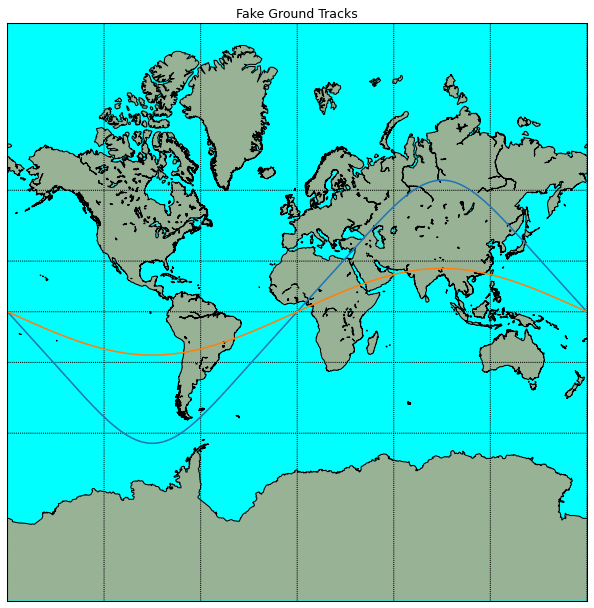

In [6]:
# test with fake data
import pandas as pd
fake_lon = np.arange(-180.,180.,1.0)
fake_lat = np.sin(np.arange(-np.pi,np.pi,np.deg2rad(1.0)))

gt1 = pd.DataFrame({'lon': fake_lon, 'lat':fake_lat*63.0})
gt2 = pd.DataFrame({'lon': fake_lon, 'lat':fake_lat*26.0})
ground_tracks = [gt1,
                 gt2]

ground_track(ground_tracks, 'Fake Ground Tracks')

YouTube video: [Groundtracks Introduction](https://www.youtube.com/watch?v=lKt080AywZ4)

## Sky Plot

![Sky plot example](images/VisualizeSatelliteTrajectoriesInSkyplotExample_01.png)
from [Matlab skyplot](https://www.mathworks.com/help/nav/ref/skyplot.html).

![ENU topocentric](images/ECEF_ENU_Longitude_Latitude_relationships.png)
from [proj.org](https://proj.org/en/9.3/operations/conversions/topocentric.html).




In [ ]:
# See Algorithms for Global Positioning, Kai Borre and Gilbert Strang, Wellesley-Cambridge Press, 2012.

def ecef2enu(x_vec, lon_obs, lat_obs):
    clon = np.cos(lon_obs)
    clat = np.cos(lat_obs)
    slon = np.sin(lon_obs)
    slat = np.sin(lat_obs)
    F = np.matrix([[ -slon, -slat*clon, clat*clon],
                   [  clon, -slat*slon, clat*slon],
                   [     0,       clat,      slat]])
    return F.transpose @ x_vec

def azi_ele(enu_vec):
    E = enu_vec.x
    N = enu_vec.y
    U = enu_vec.z
    azi = np.arctan(E/N)
    ele = np.arctan(U/np.sqrt(N**2 + E**2))
    return azi,ele
    

## Two-Line Orbital Elements (TLE)

*A two-line element set (TLE, or more rarely 2LE) or three-line element set (3LE) is a data format encoding a list of orbital elements of an Earth-orbiting object for a given point in time, the epoch. Using a suitable prediction formula, the state (position and velocity) at any point in the past or future can be estimated to some accuracy.*

For the TLE format specification, see [Two-line element set from Wikipedia](https://en.wikipedia.org/wiki/Two-line_element_set)

To request elsets (element sets), create an account at [www.space-track.org](https://www.space-track.org/) and submit an [ELSET search](https://www.space-track.org/#/gp).

In [7]:
import json
import requests
import configparser

def elset_spacetrack(sat_catno='25544', print_els=True):
    """
    requires space-track.ini file in current directory with these parameters
        [configuration]
        username = myUserName
        password = MyPa55W0rd    
    """
    uriBase                = "https://www.space-track.org"
    requestLogin           = "/ajaxauth/login"
    requestCmdAction       = "/basicspacedata/query" 
    
    config = configparser.ConfigParser()
    config.read("./space-track.ini")
    configUsr = config.get("configuration","username")
    configPwd = config.get("configuration","password")
    siteCred = {'identity': configUsr, 'password': configPwd}
    
    request_by_catno = f"/class/gp/NORAD_CAT_ID/{sat_catno}/orderby/TLE_LINE1%20ASC/format/json"

    class MyError(Exception):
        def __init___(self,args):
            Exception.__init__(self,"my exception was raised with arguments {0}".format(args))
            self.args = args

    with requests.Session() as session:
        # need to log in first. note that we get a 200 to say the web site got the data, not that we are logged in
        resp = session.post(uriBase + requestLogin, data = siteCred)
        if resp.status_code != 200:
            raise MyError(resp, "POST fail on login")
    
        resp = session.get(uriBase + requestCmdAction + request_by_catno)
        if resp.status_code != 200:
            print(resp)
            raise MyError(resp, "GET fail on request for elset by catno")
    
        retData = json.loads(resp.text)
    
        if print_els:
            for e in retData:
                print(e.keys())
                for k in e.keys():
                    print(f"{k} = {e[k]}")

        session.close()
    return retData[0]


In [8]:
e = elset_spacetrack('25544',True)

epoch = e['EPOCH']
a = e['SEMIMAJOR_AXIS']
inc = e['INCLINATION']
ecc = e['ECCENTRICITY']
raan = e['RA_OF_ASC_NODE']
arg_w = e['ARG_OF_PERICENTER']
M_A = e['MEAN_ANOMALY']
print(a, inc, ecc, raan, arg_w, M_A)

dict_keys(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM', 'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID', 'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE', 'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'])
CCSDS_OMM_VERS = 3.0
COMMENT = GENERATED VIA SPACE-TRACK.ORG API
CREATION_DATE = 2025-03-03T17:46:16
ORIGINATOR = 18 SPCS
OBJECT_NAME = ISS (ZARYA)
OBJECT_ID = 1998-067A
CENTER_NAME = EARTH
REF_FRAME = TEME
TIME_SYSTEM = UTC
MEAN_ELEMENT_THEORY = SGP4
EPOCH = 2025-03-03T15:54:55.060128
MEAN_MOTION = 15.49702064
ECCENTRICITY = 0.00059020
INCLINATION = 51.6371
RA_OF_ASC_NODE = 109.6890
ARG_OF_PE

In [ ]:
epoch

## References

R.R. Bate, D.D. Mueller, J.E. White, W.W. Saylor; Fundamentals of Astrodynamics, Dover, 2nd Ed, 2020.  

H.D. Curtis; Orbital Mechanics for Engineering Students; Butterworth-Heinemann, 4th Ed, 2021.  
[Matlab code from Curtis text](https://github.com/jorgepiloto/astrodynamics/tree/master)

A.H.J. de Ruiter, C.J. Damaren, J.R. Forbes; Spacecraft Dynamics and Control: An Introduction; Wiley, 2013.

[Matlab - Orbital Mechanics Library](https://www.mathworks.com/matlabcentral/fileexchange/13439-orbital-mechanics-library)
